# Loops & Orbits &mdash; Week 2 &mdash; Day 2 &mdash; Jupyter Notebook

## Home Run with Air Resistance

The new thing in the initialization code below is the drag coefficient. **Execute the initialization cell.** All these variables will then be available to the rest of the code.

In [1]:
# Initial speed of hit ball in meters per second
initial_speed = 60

# Initial angle of hit ball in degrees from horizontal
initial_angle = 30

# Simulation time step in seconds
delta_t = 0.1

# Distance to fence in meters
distance_to_fence = 100

# density_of_air * area_of_ball * drag_coefficient / 2
# just call the whole combo the drag coefficient
drag_coefficient = 0.012

# Below is the way g is usually defined -- the amount is 9.81 m/s^2 downwards.
# People don't put a minus sign in g -- that's a convention and we are not changing it.
# When you use this constant, you have to remember to put the minus sign in front of it
# to take care of the fact that gravity pulls in the -y direction.
g = 9.81

# Simulation time step in seconds
delta_t = 0.1

# Even though you don't know how import statements work yet, trust
# that the following import allows you to use the sin function,
# the cos function, the atan2 function (arc tangent), the sqrt function,
# and the constant pi anywhere you like in the rest of the code:
from math import sin, cos, atan2, sqrt, pi

# The following import statement makes the plotting library available to us. There is also a
# statement to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

## Function to Get Components of a Vector

In the last notebook, we had two functions that calculated horizontal velocity and vertical velocity.

Let's combine those two functions into a single function and have both components returned as a tuple. One advantage is that this conversion from degrees to radians is only done once.

**Below, fix up the formula for vertical_component.**

In [2]:
# computes horizontal and vertical components of a vector and returns them as a tuple
def vector_components(length, angle_from_horizontal):
    # convert angle from degrees to radians
    angle = angle_from_horizontal * pi / 180.0
    # this line is good
    horizontal_component = length * cos(angle)
    # fix the next line
    vertical_component = length * sin(angle)
    # return both components as a tuple
    return horizontal_component, vertical_component

# Don't change the next two lines. They are going to tell us whether your vector_components implementation is right
# is right. If it is, you'll get about 34.6 and 20.0 as the result of this cell.
initial_horizontal_velocity, initial_vertical_velocity = vector_components(initial_speed, initial_angle)
initial_horizontal_velocity, initial_vertical_velocity

(51.96152422706632, 29.999999999999996)

In [3]:
# sometimes we need to go from components to angle and speed -- instead of from angle and speed to components

# get angle from components using atan2 version of arctangent function
def angle_from_velocity(horizontal_velocity, vertical_velocity):
    # use the arctangent function
    angle = atan2(vertical_velocity, horizontal_velocity)  # atan2 and why it is better than atan is documented https://docs.python.org/3/library/math.html
    # we are working in degrees -- convert radians to degrees
    angle_in_degrees = angle * 180.0 / pi
    # return the result
    return angle_in_degrees

# get speed from components using Pythagorean theorem
def speed_from_velocity(horizontal_velocity, vertical_velocity):
    # pythagorean theorem
    hypotenuse = sqrt(horizontal_velocity**2 + vertical_velocity**2)
    # return the result
    return hypotenuse

# As a test, the following better give 30.0 degrees and 1.0 as the answer -- allowing for a little rounding error.
angle_from_velocity(sqrt(3.0) / 2.0, 0.5), speed_from_velocity(sqrt(3.0)/2.0, 0.5)

(30.000000000000004, 0.9999999999999999)

In [4]:
# now we have enough function definitions to easily write the drag function
# the function will return a tuple consisting of the horizontal acceleration and the vertical acceleration

def acceleration_with_drag(horizontal_velocity, vertical_velocity):
    angle = angle_from_velocity(horizontal_velocity, vertical_velocity)
    speed = speed_from_velocity(horizontal_velocity, vertical_velocity)
    # 
    strength_of_drag = drag_coefficient * speed**2
    horizontal_drag_component, vertical_drag_component = vector_components(strength_of_drag, angle + 180.0)
    return horizontal_drag_component, vertical_drag_component - g


## The While Loop That Does the Work

**Make the following modifications to the code below:**

* Change the test of whether the y position is greater than 0 to instead test whether the x position has gone past the fence
* **Everywhere** there is some code for x (like ```x_velocities = [initial_x_velocity]```) add the corresponding code for y (in that case, you need to add ```y_velocities = [initial_y_velocity]```)

In [5]:
# Initialize the x and y velocities
x_velocities = [initial_horizontal_velocity]
y_velocities = [initial_vertical_velocity]
# Initialize the x and y positions
x_positions = [0.0]
y_positions = [1.0]
# Initialize the times
times = [0.0]

# We want to go until the ball is over the fence. It seems our code often runs
# without terminating. Add an extra test to stop it from going more than 100 times.
# This is the first time you have seen the logical and operator!
while x_positions[-1] < distance_to_fence and len(times) < 100:
    #
    # get all the before values
    #
    # velocities
    before_x_velocity = x_velocities[-1]
    before_y_velocity = y_velocities[-1]
    # positions
    before_x_position = x_positions[-1]
    before_y_position = y_positions[-1]
    # time
    before_time = times[-1]
    #
    # calculate the after values
    #
    # use our new acceleration_with_drag function to get the accelerations
    x_acceleration, y_acceleration = acceleration_with_drag(before_x_velocity, before_y_velocity)
    #
    # bog-standard Euler update code -- but now in two dimensions
    #
    # update the x and y velocities
    after_x_velocity = before_x_velocity + delta_t * x_acceleration
    after_y_velocity = before_y_velocity + delta_t * y_acceleration
    # update the x and y positions
    after_x_position = before_x_position + delta_t * before_x_velocity
    after_y_position = before_y_position + delta_t * before_y_velocity
    # update time
    after_time = before_time + delta_t
    #
    # append all the after values to their lists
    #
    x_velocities.append(after_x_velocity)
    y_velocities.append(after_y_velocity)
    x_positions.append(after_x_position)
    y_positions.append(after_y_position)
    times.append(after_time)


## Make a Y-Position vs. X-Position Graph

**Above you have graphs for both x-vs-t and y-vs-t. For the thrird and final graph, do y-vs-x.**

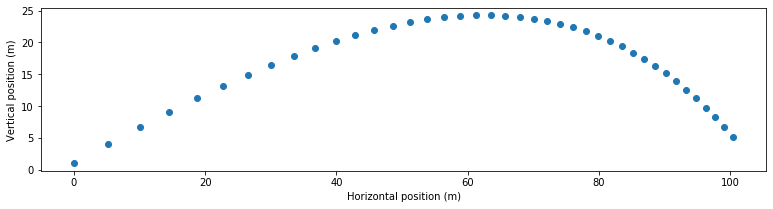

In [8]:
plt.figure(figsize=(13, 3))

plt.scatter(x_positions, y_positions)

plt.xlabel("Horizontal position (m)")
plt.ylabel("Vertical position (m)")

plt.show()

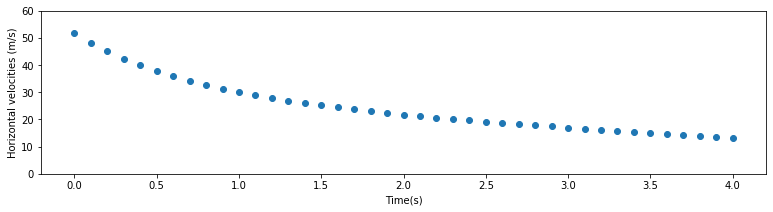

In [10]:
plt.figure(figsize=(13, 3))

plt.scatter(times, x_velocities)

plt.xlabel("Time (s)")
plt.ylabel("Horizontal velocities (m/s)")
plt.ylim(0, 60)

plt.show()

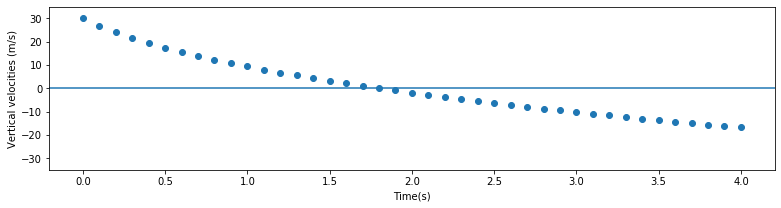

In [18]:
plt.figure(figsize=(13, 3))

plt.scatter(times, y_velocities)

plt.xlabel("Time (s)")
plt.ylabel("Vertical velocities (m/s)")
plt.ylim(-35, 35)
plt.axhline()

plt.show()

## Conclusion

We are letting the computer do so much work, it is easy to not fully appreciate what has been plotted.

Make sure your second and third graphs are correct:

* The maximum height in the second graph is about 22 meters. The maximum time is about 3 seconds.
* The maximum height in the third graph is still 22 meters. The maximum horizontal position should be when the ball cleaers the outfield fence &mdash; just over 100 meters.

and then study the differences between all three graphs.

Why do the second and third graphs look superficially similar? Check the horizontal axis. If everything has gone properly, the second graph finishes at about 3 seconds. The third graph finishes when the ball clears the outfield fence, which is 100 meters.